# Exploratory Data Analysis

> It is important to understand what you CAN DO before you learn to measure how WELL you seem to have DONE it.  

> Examples, NOT case histories

> The greatest value of a picture is when it forces us to notice what we never expected to see.

> To learn about data analysis, it is right that each of us try many things that do not work-that we tackle more problems than we make expert analyses of.

John W. Tukey, Exploratory Data Analysis (1977)



<img src='./diagrams/eda-tukey.jpg'>

> In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. EDA is different from initial data analysis (IDA),[1] which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA.

<img src='./diagrams/legos.jpeg'>

# Exploratory Data Analysis is...
- Detective work  
- Will inform what is feasible  
- Cornerstone of most analytics projects  
- Might result in the toughest challenges you face in analytics  
- Will likely take the bulk of your time  
- Likely need to continually revisit during a project  
- Messy in the real world

# Exploratory Data Analysis Could Include...
- Consolidating/aggregating/merging data  
- Extracting from non-tabular datasets
- Understanding distributions, shape, and characteristics of your data  
- Casting data to its proper type (e.g., string to date)  
- Determining where there are gaps (so you can get more data)  
- Intermediate data objects to support specific analysis  
- Schemas to address missing data and/or outliers  
- Lots and lots and lots of plots  
- Creativity  

# And You'll Probably Find...
- Numbers stored as strings, strings as numbers, …  
- Lack of metadata on ordinal data  
- Aggregations required  
- Reconstructing what history looked like at time of events (record updates)  
- Significant changes in business processes that create structural shifts  
- Data is scattered across hundreds of Excel files  
- You need to engineer supplemental data  
- NULL means different things at different times. 

# Goals

The objectives of EDA are to:

- Suggest hypotheses about the causes of observed phenomena  
- Assess assumptions on which statistical inference will be based  
- Support the selection of appropriate statistical tools and techniques  
- Provide a basis for further data collection through surveys or experiments

# A minute on Tidy Data
http://vita.had.co.nz/papers/tidy-data.pdf

> A huge amount of effort is spent cleaning data to get it ready for analysis, but there has been little research on how to make data cleaning as easy and effective as possible. This paper tackles a small, but important, component of data cleaning: data tidying. **Tidy datasets are easy to manipulate, model and visualise, and have a specific structure: each variable is a column, each observation is a row, and each type of observational unit is a table.** This framework makes it easy to tidy messy datasets because only a small set of tools are needed to deal with a wide range of un-tidy datasets. This structure also makes it easier to develop tidy tools for data analysis, tools that both input and output tidy datasets. The advantages of a consistent data structure and matching tools are demonstrated with a case study free from mundane data manipulation chores.

<img src='./diagrams/tidy-data.png'>

# Example: Tidying 
Data: Football Salaries  
Accessed Source: https://github.com/rfordatascience/tidytuesday/tree/master/data/2018/2018-04-09  
Original source: https://www.spotrac.com/rankings/

This example is to highlight some ways you may want to explore numeric data, e.g., looking at the distributions, getting summary statistics, and looking at how the data varies by dimensional attributes. 

Salaries are in dollars and each observation is going to be an individual player's salary.

If you are new to American Football:

<img src='./diagrams/football-positions.png'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nfl = pd.read_excel('https://github.com/msaricaumbc/DS_data/blob/master/ds602/nfl_salary.xlsx?raw=true')
print(f'Rows: {nfl.shape[0]:,} | Columns: {nfl.shape[1]:,}')
nfl.head()

Rows: 800 | Columns: 11


,year,Cornerback,Defensive Lineman,Linebacker,Offensive Lineman,Quarterback,Running Back,Safety,Special Teamer,Tight End,Wide Receiver
0,2011,11265916,17818000,16420000,15960000,17228125.0,12955000,8871428,4300000.0,8734375,16250000
1,2011,11000000,16200000,15623000,12800000,16000000.0,10873833,8787500,3725000.0,8591000,14175000
2,2011,10000000,12476000,11825000,11767500,14400000.0,9479000,8282500,3556176.0,8290000,11424000
3,2011,10000000,11904706,10083333,10358200,14100000.0,7700000,8000000,3500000.0,7723333,11415000
4,2011,10000000,11762782,10020000,10000000,13510000.0,7500000,7804333,3250000.0,6974666,10800000


### This violates the tidy principles (similar to the Census data and the WHO data).
Let's melt it, so each observation is a row (an individual player's salary for a given year).

In [2]:
nflLong = nfl.melt(id_vars='year', var_name='position', value_name='salary')
nflLong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      8000 non-null   int64  
 1   position  8000 non-null   object 
 2   salary    7944 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 187.6+ KB


In [3]:
nflLong.head()

,year,position,salary
0,2011,Cornerback,11265916.0
1,2011,Cornerback,11000000.0
2,2011,Cornerback,10000000.0
3,2011,Cornerback,10000000.0
4,2011,Cornerback,10000000.0


__Drop the NULL records. Looks like some positions didn't have an equal number of observations entered for each year__

In [4]:
nflLong = nflLong.dropna()
nflLong.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7944 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      7944 non-null   int64  
 1   position  7944 non-null   object 
 2   salary    7944 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 248.2+ KB


__We have: two dimensions: time (year), position, and a numerical value.__
For numerical data, the standard summary is the 5-number summary:
- Minimum.  
- 1st quartile. 
- Median. 
- 3rd quartile.  
- Maximum.  

And the standard moments:  
- Mean.  
- Variance or standard deviation.  

In [5]:
# /1000 to scale in ths.
(nflLong['salary'].describe()/1000).round(2)

count        7.94
mean      3487.88
std       3628.40
min         24.70
25%        885.00
50%       2266.25
75%       4620.38
max      37000.00
Name: salary, dtype: float64

### Aggregate Summaries

In [6]:
nflLong.groupby('year')['salary'].count().sort_index()

year
2011    996
2012    988
2013    993
2014    989
2015    997
2016    995
2017    997
2018    989
Name: salary, dtype: int64

### Summaries with pivot tables

>A pivot table is a table of grouped values that aggregates the individual items of a more extensive table (such as from a database, spreadsheet, or business intelligence program) within one or more discrete categories. This summary might include sums, averages, or other statistics, which the pivot table groups together using a chosen aggregation function applied to the grouped values.
<br><br>Pivot tables are a technique in data processing. They arrange and rearrange (or "pivot") statistics in order to draw attention to useful information. This leads to finding figures and facts quickly making them integral to data analysis. This ultimately leads to helping businesses or individuals make educated decisions.
<br><br>Although pivot table is a generic term, Microsoft trademarked PivotTable in the United States in 1994 (canceled in 2020)
[Wikipedia](https://en.wikipedia.org/wiki/Pivot_table)

In [7]:
meanNflPivot = (
    (nflLong.pivot_table(index='position', columns='year', values='salary', aggfunc='median')/1000000)
    .round(1)
)

meanNflPivot

year,2011,2012,2013,2014,2015,2016,2017,2018
position,,,,,,,,
Cornerback,1.9,2.0,1.9,2.2,2.2,2.6,2.5,2.9
Defensive Lineman,3.5,4.1,3.3,4.0,3.9,4.2,5.1,5.5
Linebacker,3.4,3.4,2.6,3.5,4.0,3.7,3.4,3.6
Offensive Lineman,3.9,3.6,3.9,4.2,4.3,4.9,6.0,6.9
Quarterback,1.8,1.3,0.9,1.2,1.2,1.8,1.2,1.3
Running Back,0.9,0.8,0.8,0.8,0.8,0.8,1.1,0.8
Safety,1.4,1.2,1.3,1.4,1.6,1.8,2.2,2.0
Special Teamer,0.9,1.0,0.8,0.8,0.9,0.9,0.9,1.0
Tight End,0.7,0.7,0.7,0.8,1.0,1.2,1.2,1.4


#### Adding a splash of color with heat maps
[Heat maps](https://en.wikipedia.org/wiki/Heat_map)

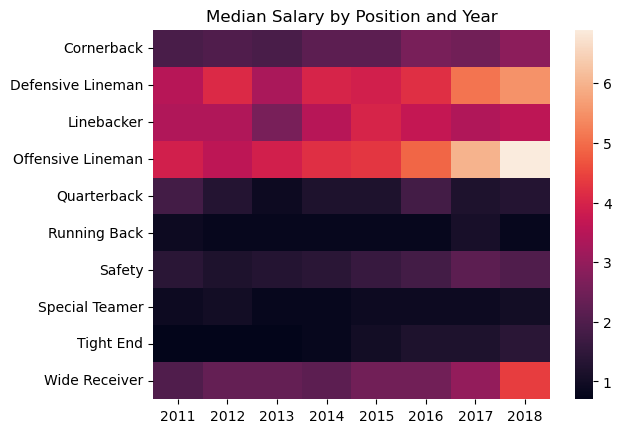

In [8]:
import seaborn as sns

sns.heatmap(meanNflPivot)
plt.xlabel('')
plt.ylabel('')
plt.title('Median Salary by Position and Year')
plt.show()

### Trends in Salary

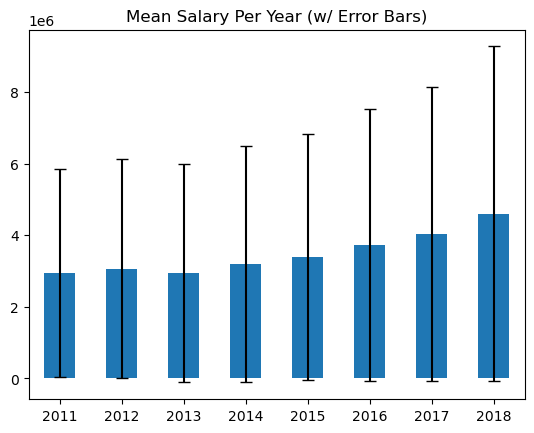

In [9]:
yrAvg = nflLong.groupby('year')['salary'].mean()
yrErr = nflLong.groupby('year')['salary'].std()

fig, ax = plt.subplots()
yrAvg.plot.bar(yerr=yrErr, ax=ax, capsize=4, rot=0)
plt.title('Mean Salary Per Year (w/ Error Bars)')
plt.xlabel('')
plt.show()

__Looks like it is increasing over time, that would be important to know.__

### Distributions

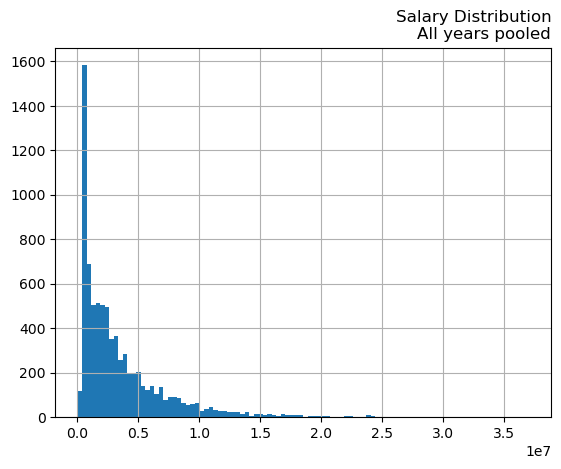

In [10]:
nflLong['salary'].hist(bins=100)
plt.title('Salary Distribution\nAll years pooled', loc='right')
plt.show()

## Log Transforms will compress the variance
Also useful if performing regression, log-transforms will help with some techical issues regarding correlations to residuals, and will generally model out better. For money ($$) data, the coefficients will be elasticities, which are nice for presenting to business users.

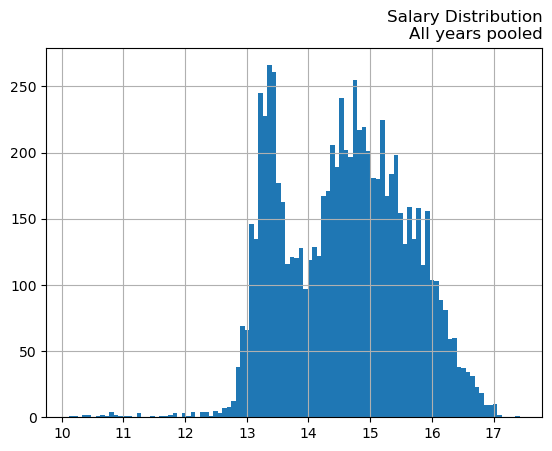

In [11]:
np.log(nflLong['salary']).hist(bins=100)
plt.title('Salary Distribution\nAll years pooled', loc='right')
plt.show()

In [12]:
nflLong['salaryBin'] = (nflLong['salary'] / 1000000).astype(int)
nflLong.head()

,year,position,salary,salaryBin
0,2011,Cornerback,11265916.0,11
1,2011,Cornerback,11000000.0,11
2,2011,Cornerback,10000000.0,10
3,2011,Cornerback,10000000.0,10
4,2011,Cornerback,10000000.0,10


In [13]:
nflSalaryPivot = nflLong.pivot_table(index='salaryBin', columns='year', values='salary', aggfunc='count')
nflSalaryPivot

year,2011,2012,2013,2014,2015,2016,2017,2018
salaryBin,,,,,,,,
0,297.0,281.0,317.0,291.0,268.0,258.0,233.0,228.0
1,188.0,207.0,191.0,173.0,165.0,157.0,169.0,141.0
2,162.0,145.0,157.0,146.0,171.0,156.0,137.0,129.0
3,99.0,89.0,90.0,106.0,97.0,95.0,108.0,85.0
4,78.0,90.0,56.0,82.0,78.0,68.0,66.0,65.0
5,46.0,38.0,50.0,43.0,46.0,59.0,54.0,66.0
6,34.0,29.0,33.0,36.0,42.0,48.0,56.0,45.0
7,25.0,24.0,14.0,30.0,39.0,35.0,32.0,43.0
8,19.0,24.0,29.0,22.0,25.0,28.0,32.0,37.0


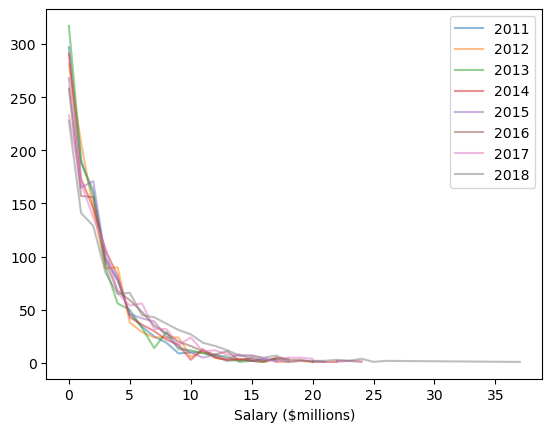

In [14]:
nflSalaryPivot.plot(alpha=0.5)
plt.legend(title='')
plt.xlabel('Salary ($millions)')
plt.show()

#### Boxplots for looking at the variance between groups

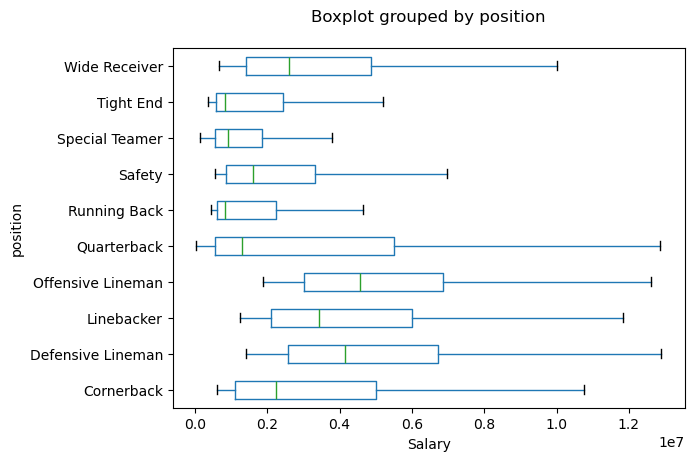

In [15]:
# nflLong.boxplot(column='salary', by='position', vert=False, showfliers=True)
nflLong.boxplot(column='salary', by='position', vert=False, showfliers=False)
plt.grid(False)
plt.title('')
plt.xlabel('Salary')
plt.show()

__What can we say about the salaries by position?__

# Numerical Comparisons
Data: iris

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Data summaries by groups

In [17]:
df.groupby('species').describe().T


species             Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length count    50.000000        50.000000       50.000000
             mean      5.006000         5.936000        6.588000
             std       0.352490         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    50.000000        50.000000       50.000000
             mean      3.418000         2.770000        2.974000
             std       0.381024         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.125000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.675000         3.000000        3.175000
             max       4.400000         3.400000        3.800000
petal_length count    50.000000        50.000000       50.000000
             mean      1.464000         4.260000        5.552000
             std       0.173511         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.575000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    50.000000        50.000000       50.000000
             mean      0.244000         1.326000        2.026000
             std       0.107210         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000

### Picture is worth 1,000 words (or 96 cells)

In [18]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


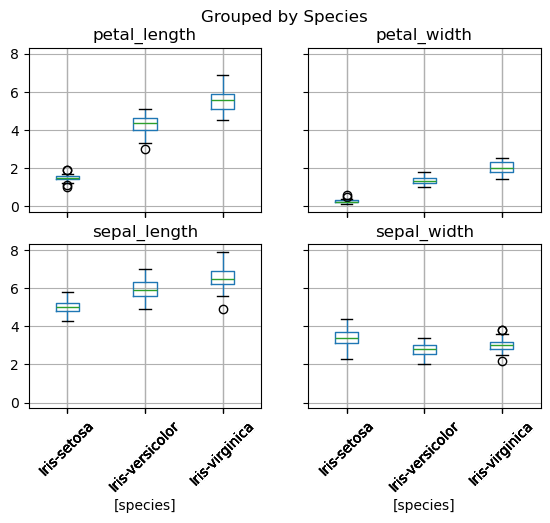

In [19]:
subs = df.boxplot(by='species')

fig = subs[0][0].get_figure()
fig.suptitle('Grouped by Species')

rotation = 45
for s in subs:
    x1, x2 = s
    
    for m in x1.get_xticklabels():
        m.set_rotation(rotation)
        
    for m in x2.get_xticklabels():
        m.set_rotation(rotation)
        
plt.show()

### Scatterplots and Histograms

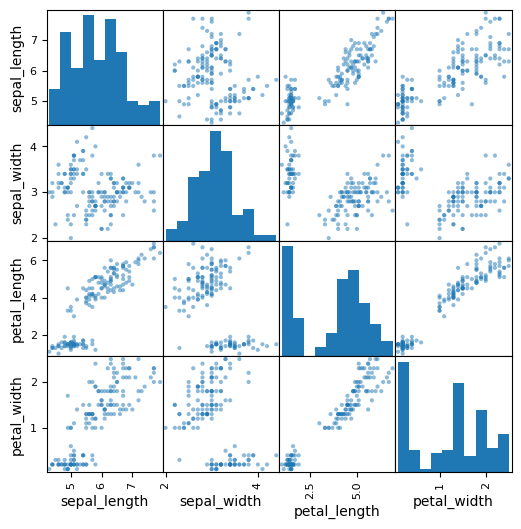

In [20]:
pd.plotting.scatter_matrix(df, figsize=(6,6))
plt.show()

__Scatterplot matrices are a valuable tool, but lose their utility as the number of features grow.__

### Parallel Coordinates
Sometimes scatter plot matrices get too crowded and it's hard to see co-movement between different features.

From Wikipedia:
> To show a set of points in an n-dimensional space, a backdrop is drawn consisting of n parallel lines, typically vertical and equally spaced. A point in n-dimensional space is represented as a polyline with vertices on the parallel axes; the position of the vertex on the i-th axis corresponds to the i-th coordinate of the point.   
This visualization is closely related to time series visualization, except that it is applied to data where the axes do not correspond to points in time, and therefore do not have a natural order. Therefore, different axis arrangements may be of interest.

**Warning: Make sure your data is on the same scale, or this won't be as useful.**

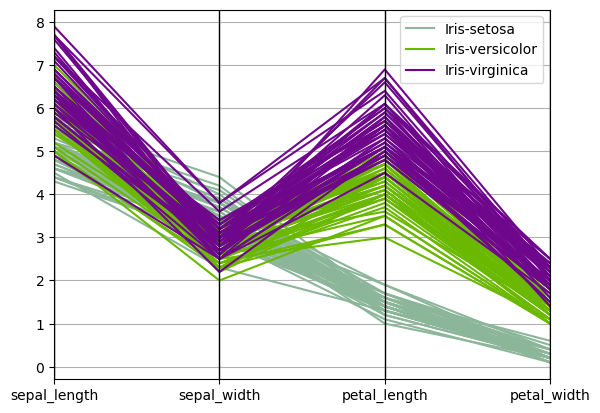

In [21]:
pd.plotting.parallel_coordinates(df, class_column='species')
plt.show()

### Andrews Curve
From Wikipedia:

> In data visualization, an Andrews plot or Andrews curve is a way to visualize structure in high-dimensional data. It is basically a rolled-down, non-integer version of the Kent–Kiviat radar m chart, or a smoothed version of a parallel coordinate plot. It is named after the statistician David F. Andrews.

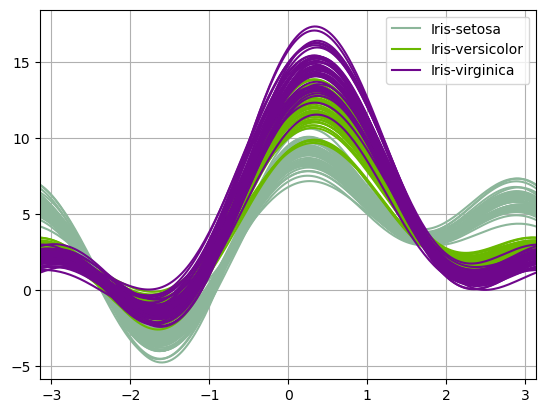

In [22]:
pd.plotting.andrews_curves(df, 'species')
plt.show()

### Reducing the number of dimensions with Principal Component Analysis (PCA)
[Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)

An unsupervised technique to reduce the feature space into **N** orthogonal vectors that eventually capture all the variation in the feature space. Typically used for reducing dimensionality and/or visualization.

It is a handy trick for reducing the number of features from **N** to **2** in order to plot on a scatterplot.
- If the 2 components explain a large amount of the variance this can be very helpful.  
- If the 2 components don't explain a significant amount of the variance, it can be misleading.  
- PCA is very scale sensitive, so be careful.  
- We'll discuss this is more detail later.  

In [23]:
#a quick reminder of the data
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


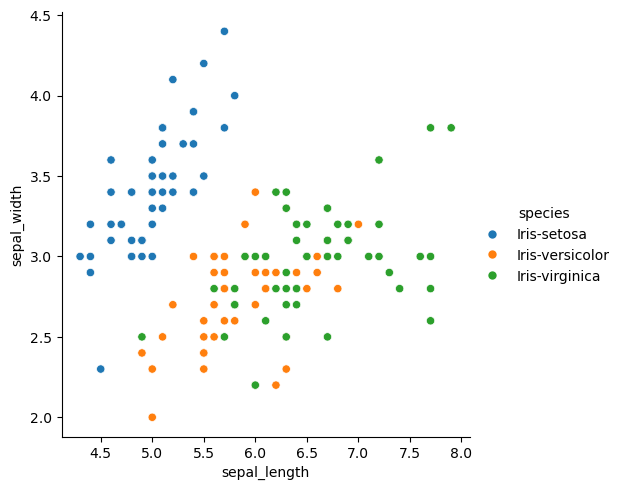

In [24]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

In [25]:
df.iloc[:, :4]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
dfPca = pd.DataFrame(pca.fit_transform(df.iloc[:, :4]), columns=['pc1','pc2'])
dfPca

,pc1,pc2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


In [27]:
dfM = df.join(dfPca)
dfM.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pc1,pc2
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.684207,0.326607
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.715391,-0.169557
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.889820,-0.137346
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.746437,-0.311124
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.728593,0.333925


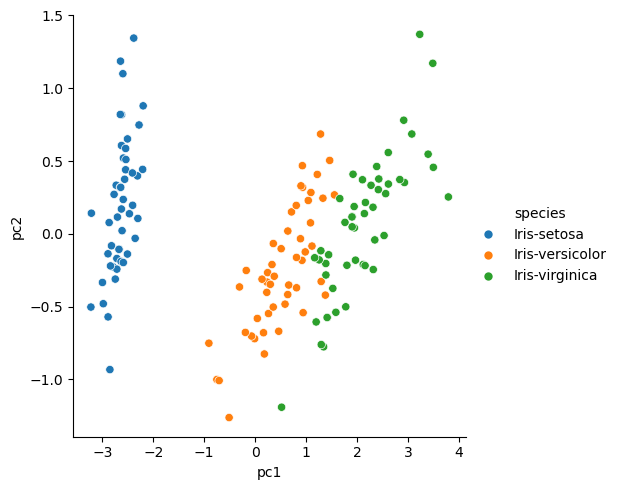

In [28]:
sns.relplot(x='pc1', y='pc2', hue='species', data=dfM)
plt.show()

# Joining Data
In organization, most of the time you'll need to assemble your data from multiple sources. There may be multiple major and intermediate steps to get to the point where you have your training data.

<img src='./diagrams/join-pipeline.png'>

### Sometimes how to configure the join might be a little tricky, but here's a guide:

<img src='./diagrams/sql-join2.png'>

### Example: We want to determine relationship of urban population rates to taxes.
- File 1: urban population. 
- File 2: taxes.

In [29]:
import pandas as pd
import numpy as np

population = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/share-of-population-urban.csv')
taxes = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/taxes-on-incomes-of-individuals-and-corporations-gdp.csv')

population.info()
print('\n-------------------------------------\n')
taxes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15072 entries, 0 to 15071
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Entity            15072 non-null  object
 1   Code              12404 non-null  object
 2   Year              15072 non-null  int64 
 3   Urban_Population  15072 non-null  object
dtypes: int64(1), object(3)
memory usage: 471.1+ KB

-------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4871 entries, 0 to 4870
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           4871 non-null   object 
 1   Code             4871 non-null   object 
 2   Year             4871 non-null   int64  
 3   Tax_Percent_GDP  4871 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 152.3+ KB


### Left Join

In [30]:
leftJoin = pd.merge(population, taxes, how='left', on=['Entity','Code','Year'])
leftJoin.shape

(15072, 5)

In [ ]:
leftJoin.info()

### Inner Join

In [31]:
innerJoin = pd.merge(population, taxes, how='inner', on=['Entity','Code','Year'])
innerJoin.shape

(4822, 5)

In [32]:
innerJoin.head()

,Entity,Code,Year,Urban_Population,Tax_Percent_GDP
0,Afghanistan,AFG,2003,22.353,0.165953
1,Afghanistan,AFG,2004,22.5,0.411647
2,Afghanistan,AFG,2006,22.907,1.261181
3,Afghanistan,AFG,2007,23.113,1.323461
4,Afghanistan,AFG,2008,23.32,1.664719


In [33]:
innerJoin[['Urban_Population','Tax_Percent_GDP']].corr()

ValueError: could not convert string to float: '43%'

<img src='./diagrams/what.png'>

__Population is a string! Need to cast it to a numeric value.__

In [34]:
innerJoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            4822 non-null   object 
 1   Code              4822 non-null   object 
 2   Year              4822 non-null   int64  
 3   Urban_Population  4822 non-null   object 
 4   Tax_Percent_GDP   4822 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 188.5+ KB


In [35]:
innerJoin['Population'] = pd.to_numeric(innerJoin['Urban_Population'], errors='coerce')
innerJoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            4822 non-null   object 
 1   Code              4822 non-null   object 
 2   Year              4822 non-null   int64  
 3   Urban_Population  4822 non-null   object 
 4   Tax_Percent_GDP   4822 non-null   float64
 5   Population        4807 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 226.2+ KB


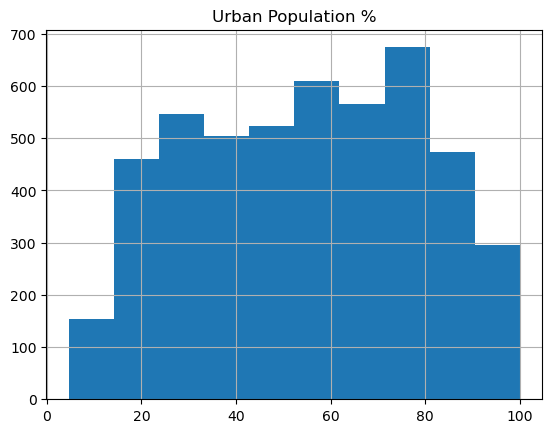

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

innerJoin['Population'].hist()
plt.title('Urban Population %')
plt.show()

In [37]:
innerJoin[['Population','Tax_Percent_GDP']].corr()

,Population,Tax_Percent_GDP
Population,1.000000,0.436384
Tax_Percent_GDP,0.436384,1.000000


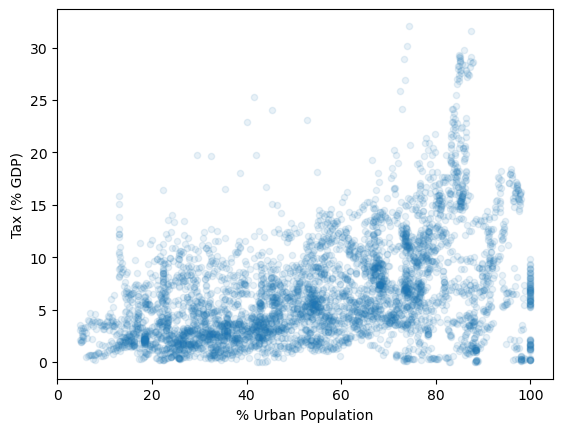

In [38]:
innerJoin[['Population','Tax_Percent_GDP']].plot.scatter(x='Population', y='Tax_Percent_GDP', alpha=.1)
plt.xlabel('% Urban Population')
plt.ylabel('Tax (% GDP)')
plt.show()

# Concatenating Data
- Sometimes do to data collection convenience or file sizes, you may need to deal with a lot of files  
- Sometimes the structure will be identical so you can effectively concatenate them together  
- In order to loop through them you’ll likely need to use some of the base Python data structures (e.g., list, dictionary), loops, and/or the base libraries to make interacting with the file system more convenient  


<img src='./diagrams/excel-pipeline.png'>

### Example data: https://www.ssa.gov/OACT/babynames/limits.html

In [39]:
# !pip install zipfile

import requests
from zipfile import ZipFile

def download_file(file_name, url):
    # Use requests Session with comprehensive browser headers
    session = requests.Session()
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
        'Accept': '*/*',
        'Accept-Language': 'en-US,en;q=0.9',
        'Referer': 'https://www.ssa.gov/',
        'Origin': 'https://www.ssa.gov',
        'Connection': 'keep-alive',
        'Sec-Fetch-Dest': 'document',
        'Sec-Fetch-Mode': 'navigate',
        'Sec-Fetch-Site': 'same-origin',
    }
    session.headers.update(headers)
    
    # First, try to get the main page to establish a session
    try:
        session.get('https://www.ssa.gov/OACT/babynames/state/', timeout=10)
    except:
        pass  # Continue even if this fails
    
    # Now download the file
    response = session.get(url, headers=headers, timeout=30, allow_redirects=True)
    response.raise_for_status()  # Raise an error for bad status codes
    
    # Ensure the directory exists
    import os
    os.makedirs(os.path.dirname(file_name), exist_ok=True)
    
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Successfully downloaded {file_name}')
        
def unzip(file_name, path='./'):
    with ZipFile(file_name, 'r') as zip: 
        zip.printdir() 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!')


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

data_url = 'https://www.ssa.gov/OACT/babynames/state/namesbystate.zip'
filename='data/namesbystate.zip'
fldr = 'data/namesbystate'

if os.path.exists(fldr) == False:
    print("data folder doesn't exist... creating & downloading data files")
    os.makedirs(fldr)
    download_file(filename, data_url)
    unzip(filename, fldr)

fldrFiles = os.listdir(fldr)

print(f'File count: {len(fldrFiles)}')

File count: 52


#### Analyze the types of files

In [41]:
fldrExt = {}
for f in fldrFiles:
    extention = f.split('.')[-1].lower()
    fldrExt[extention] = fldrExt.get(extention, 0) + 1
    
fldrExt

{'txt': 51, 'pdf': 1}

#### Loop through and import

In [42]:
filesImport = [x for x in fldrFiles if x.lower().endswith('.txt')]

dfHolder = {}
for f in filesImport:
    dfHolder[f.split('.')[0]] = pd.read_csv(os.path.join(fldr, f),
                                            header=None,
                                            names=['state','gender','year','name','count'])
    
print(f'Number of files: {len(dfHolder)}')

Number of files: 51


#### Union the files

In [43]:
df = pd.concat(dfHolder, axis=0, ignore_index=True)

dfx, dfy = df.shape
print(f'Rows: {dfx:,}\nColumns: {dfy:,}')

Rows: 6,600,640
Columns: 5


In [44]:
df.head()

,state,gender,year,name,count
0,IN,F,1910,Mary,619
1,IN,F,1910,Helen,324
2,IN,F,1910,Ruth,238
3,IN,F,1910,Dorothy,215
4,IN,F,1910,Mildred,200


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600640 entries, 0 to 6600639
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   state   object
 1   gender  object
 2   year    int64 
 3   name    object
 4   count   int64 
dtypes: int64(2), object(3)
memory usage: 251.8+ MB


### Analysis Ready

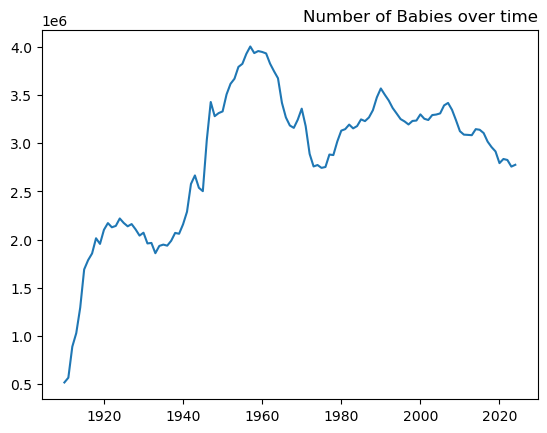

In [46]:
df.groupby('year')['count'].sum().plot()
plt.title('Number of Babies over time', loc='right')
plt.xlabel('')
plt.show()

#### Most popular names

In [47]:
# top 5 names for each gender over the past 5 years:
(
    df.query('year >= 2016')
    .groupby(['gender','name'])['count']
    .sum()
    .groupby('gender')
    .nlargest(5)
)

gender  gender  name     
F       F       Olivia       157018
                Emma         148276
                Sophia       121055
                Ava          117489
                Charlotte    116937
M       M       Liam         181611
                Noah         170807
                Oliver       128020
                James        116582
                William      116581
Name: count, dtype: int64

### Testing the influence of celebrities on naming trends
Can we associate naming trends with celebrity popularity?
<img src='./diagrams/elvis.jpg'>
Image Source: Wikipedia

#### Albums:
- Studio albums  
- Elvis Presley (1956)  
- Elvis (1956)  
- Elvis' Christmas Album (1957)  
- Elvis is Back! (1960)  
- His Hand in Mine (1960)  
- Something for Everybody (1961)  
- Pot Luck (1962)  
- Elvis for Everyone! (1965)  
- How Great Thou Art (1967)  
- From Elvis in Memphis (1969)  
- From Memphis to Vegas / From Vegas to Memphis (1969)  
- That's the Way It Is (1970)  
- Elvis Country (I'm 10,000 Years Old) (1971)  
- Love Letters from Elvis (1971)  
- Elvis sings The Wonderful World of Christmas (1971)  
- Elvis Now (1972)  
- He Touched Me (1972)  
- Elvis (1973) (The "Fool" Album)  
- Raised on Rock / For Ol' Times Sake (1973)  
- Good Times (1974)  
- Promised Land (1975)  
- Today (1975)  
- From Elvis Presley Boulevard, Memphis, Tennessee (1976)  
- Moody Blue (1977)  

In [48]:
def check_name_popularity_over_years(name):
    print(sum(df.name == name))
    df.query('name==@name').groupby('year')['count'].sum().plot()
    plt.title(f'Trend of Babies Named "{name}"', loc='center')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [49]:
sum(df.name == 'Elvis')

1008

1008


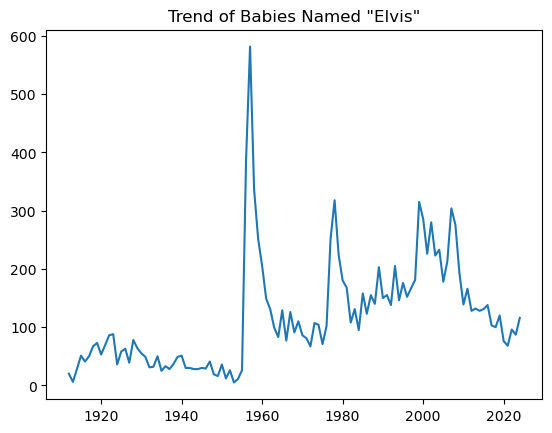

In [50]:
check_name_popularity_over_years('Elvis')

1816


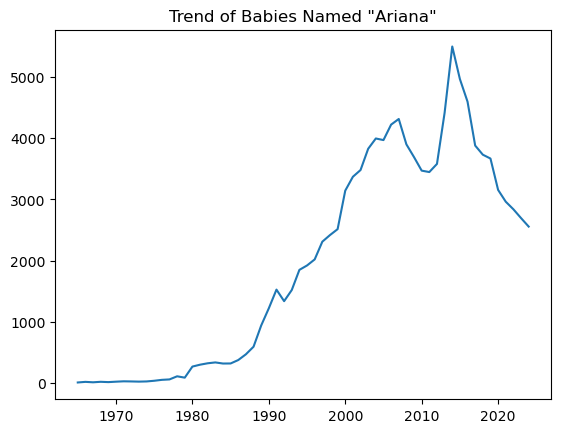

In [51]:
check_name_popularity_over_years('Ariana')

142


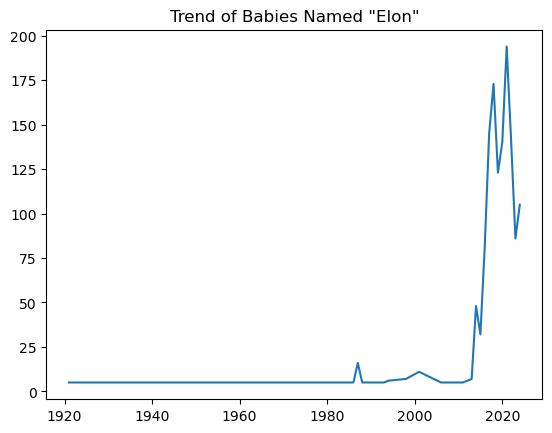

In [52]:
check_name_popularity_over_years('Elon')

1942


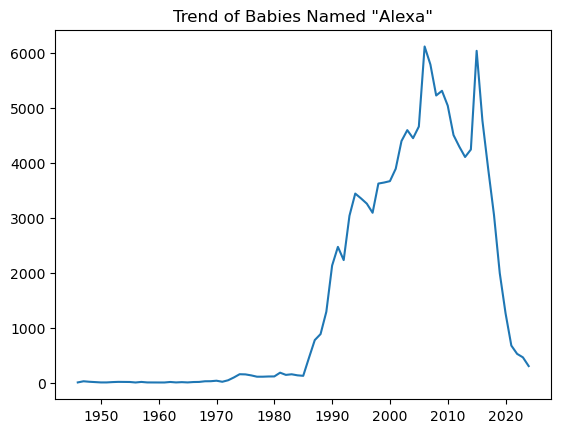

In [53]:
check_name_popularity_over_years('Alexa')
# why Alexa name dropped ??

45


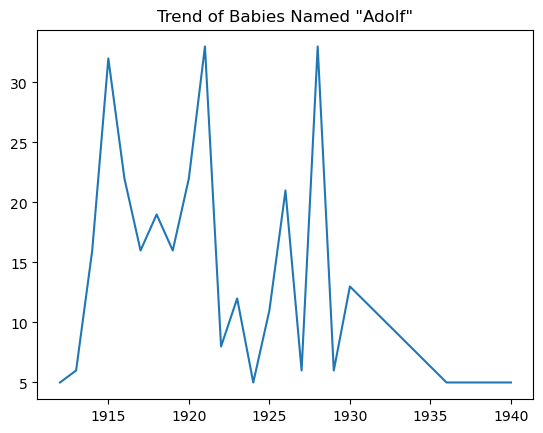

In [60]:
check_name_popularity_over_years('Adolf')

# Resources
[Edward Tufte](https://www.edwardtufte.com/tufte/)
<br>[Stephen Few](https://www.perceptualedge.com)
<br>[Save The Pies for Dessert](https://www.perceptualedge.com/articles/visual_business_intelligence/save_the_pies_for_dessert.pdf)
<br>[Tableau Public Gallery](https://public.tableau.com/en-us/gallery/?tab=viz-of-the-day&type=viz-of-the-day)
<br>[Matplotlib](https://matplotlib.org)
<br>[seaborn](https://seaborn.pydata.org)
<br>[JunkCharts - examples of what not to do](https://junkcharts.typepad.com)


# Some refreshers

https://github.com/msaricaumbc/DS601/blob/main/Week03/week03_2.ipynb

https://github.com/msaricaumbc/DS601/blob/main/Week04/week04%20-%20data%20transpormation%202.ipynb

https://github.com/msaricaumbc/DS601/blob/main/Week07/week7%20relational%20data.ipynb